## Classification Code:

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.metrics import precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')
df 

/tmp/ipykernel_9742/1749502736.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


In [3]:
print(list(df.columns))

['transact', 'onServiceConnected', 'bindService', 'attachInterface', 'ServiceConnection', 'android.os.Binder', 'SEND_SMS', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Ljava.lang.Class.cast', 'Ljava.net.URLDecoder', 'android.content.pm.Signature', 'android.telephony.SmsManager', 'READ_PHONE_STATE', 'getBinder', 'ClassLoader', 'Landroid.content.Context.registerReceiver', 'Ljava.lang.Class.getField', 'Landroid.content.Context.unregisterReceiver', 'GET_ACCOUNTS', 'RECEIVE_SMS', 'Ljava.lang.Class.getDeclaredField', 'READ_SMS', 'getCallingUid', 'Ljavax.crypto.spec.SecretKeySpec', 'android.intent.action.BOOT_COMPLETED', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'android.content.pm.PackageInfo', 'KeySpec', 'TelephonyManager.getLine1Number', 'DexClassLoader', 'HttpGet.init', 'SecretKey', 'Ljava.lang.Class.getMethod', 'System.loadLibrary', 'android.intent.action.SEND', 'Ljavax.crypto.Cipher', 'WRITE_SMS', 'READ_SYNC_SETTINGS', 'AUTHENTICATE_ACCOUNTS', 'android.telephony.gsm.

In [4]:
print("Total missing values : ",sum(list(df.isna().sum())))

Total missing values :  0


In [5]:
classes,count = np.unique(df['class'],return_counts=True)
print(classes,count)

['B' 'S'] [9476 5560]


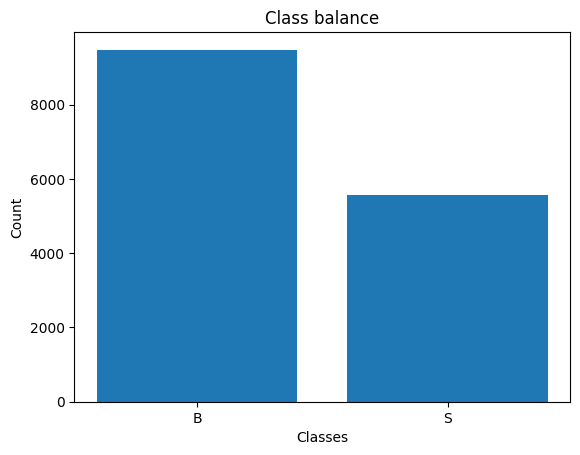

In [6]:
plt.bar(classes,count)
plt.title("Class balance")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [7]:
#Performing Label Encoding
label_encoder = LabelEncoder()
print(label_encoder.fit_transform(classes),classes)
df = df.replace(classes,label_encoder.fit_transform(classes))

[0 1] ['B' 'S']


In [8]:
#Dataset contains special characters like '?' and 'S'. Setting them to NaN and using dropna() to remove them
df=df.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(df.isna().sum())))
df.dropna(inplace=True)
for c in df.columns:
    df[c] = pd.to_numeric(df[c])
df 

Total missing values :  5


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


In [9]:
print("Total Features : ",len(df.columns)-1)

Total Features :  215


In [10]:
train_x,test_x,train_y,test_y = train_test_split(df[df.columns[:len(df.columns)-1]].to_numpy(),
                                                df[df.columns[-1]].to_numpy(),
                                                test_size = 0.2,
                                                shuffle=True)
print("Train features size : ",len(train_x))
print("Train labels size : ",len(train_y))
print("Test features size : ",len(test_x))
print("Test features size : ",len(test_y))
train_y

Train features size :  12024
Train labels size :  12024
Test features size :  3007
Test features size :  3007


array([1, 0, 0, ..., 0, 0, 1])

In [11]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (12024, 215)
Train labels :  (12024,)
Test Features :  (3007, 215)
Test labels :  (3007,)


In [12]:
import torch
import torch.nn as nn 
import torch.optim as optim

In [13]:
# Convert the numpy arrays to PyTorch tensors
train_x_tensor = torch.tensor(train_x, dtype=torch.float32)
train_y_tensor = torch.tensor(train_y, dtype=torch.long)
print(train_x_tensor,train_y_tensor)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([1, 0, 0,  ..., 0, 0, 1])


In [14]:
train_x_tensor.shape, train_y_tensor.shape

(torch.Size([12024, 215]), torch.Size([12024]))

In [15]:
# Model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [16]:
# Model Training
input_size = train_x_tensor.shape[1]
hidden_size = 64
num_classes = 2  # binary classification (malware vs. benign)
learning_rate = 0.001
num_epochs = 50

model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store accuracy and loss values
train_accuracy = []
train_loss = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(train_x_tensor)
    loss = criterion(outputs, train_y_tensor)
    loss.backward()
    optimizer.step()

    # Calculating accuracy
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == train_y_tensor).sum().item() / train_y_tensor.size(0)
    
    # Storing accuracy and loss values
    train_accuracy.append(accuracy)
    train_loss.append(loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy}')

Epoch [1/50], Loss: 0.696171760559082, Accuracy: 0.4856952761144378
Epoch [2/50], Loss: 0.6692479848861694, Accuracy: 0.6933632734530938
Epoch [3/50], Loss: 0.6452684998512268, Accuracy: 0.7336161011310712
Epoch [4/50], Loss: 0.6234961152076721, Accuracy: 0.740602129075183
Epoch [5/50], Loss: 0.6033914089202881, Accuracy: 0.7483366600133067
Epoch [6/50], Loss: 0.5846490263938904, Accuracy: 0.7543246839654025
Epoch [7/50], Loss: 0.5669448375701904, Accuracy: 0.7676314038589488
Epoch [8/50], Loss: 0.5500330328941345, Accuracy: 0.7694610778443114
Epoch [9/50], Loss: 0.5337303280830383, Accuracy: 0.7782767797737857
Epoch [10/50], Loss: 0.5177594423294067, Accuracy: 0.7835163007318696
Epoch [11/50], Loss: 0.5019897222518921, Accuracy: 0.814870259481038
Epoch [12/50], Loss: 0.48631858825683594, Accuracy: 0.8236027944111777
Epoch [13/50], Loss: 0.47065407037734985, Accuracy: 0.8337491683300067
Epoch [14/50], Loss: 0.45486995577812195, Accuracy: 0.8543745841650033
Epoch [15/50], Loss: 0.438914

In [18]:
# Model Evaluation
with torch.no_grad():
    outputs = model(train_x_tensor)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == train_y_tensor).sum().item() / train_y_tensor.size(0)
    print(f'Final Accuracy: {accuracy}')

Final Accuracy: 0.9515968063872255


In [19]:
# Saving the trained model
torch.save(model.state_dict(), '1stmodel.pth')
print('Model saved successfully.')

Model saved successfully.


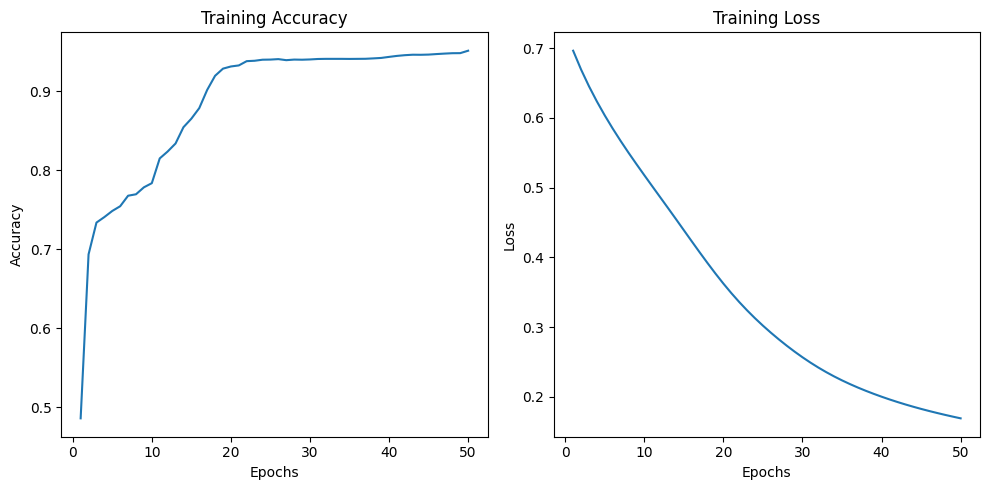

In [20]:
# Plotting accuracy and loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.tight_layout()
plt.show()

In [21]:
test_x_tensor = torch.tensor(test_x, dtype=torch.float32)
test_y_tensor = torch.tensor(test_y, dtype=torch.long)
print(test_x_tensor, test_y_tensor)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([1, 1, 0,  ..., 1, 0, 0])


In [22]:
input_size = test_x_tensor.shape[1]
hidden_size = 64
num_classes = 2  

model = NeuralNet(input_size, hidden_size, num_classes)

# Loading the saved model
model_path = '1stmodel.pth'
model.load_state_dict(torch.load(model_path))
model.eval()

NeuralNet(
  (fc1): Linear(in_features=215, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [23]:
# Performing inference on the test data
with torch.no_grad():
    outputs = model(test_x_tensor)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == test_y_tensor).sum().item() / test_y_tensor.size(0)

print(f'Testing Accuracy: {accuracy}')

Testing Accuracy: 0.9494512803458597
